In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.image as mp
import pandas as pd
import numpy as np
import math
import csv
import cv2
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
# Read dataset to pandas dataframe
dataset = pd.read_csv("C:/Users/Abhi/Desktop/Minor/playerDataCsv/Virat Kohli.csv")

In [3]:
dataset.head()

,Unnamed: 0,balls_,balls_ball_speed,balls_ball_within_over,balls_bat_right_handed,balls_batsman,balls_batsman_name,balls_batting_team,balls_bowler,balls_bowler_name,...,balls_non_striker,balls_ovr,balls_runs_batter,balls_runs_w_extras,balls_who_out,balls_wicket,balls_wicket_method,balls_x,balls_y,balls_z
0,868,387,-2.237,1,y,253802,Virat Kohli,India,6033,Mitchell Johnson,...,Rohit Sharma,13.1,0,0,NaN,False,NaN,137,176,6
1,869,388,90.855,2,y,253802,Virat Kohli,India,6033,Mitchell Johnson,...,Rohit Sharma,13.2,0,0,NaN,False,NaN,123,145,7
2,870,389,91.053,3,y,253802,Virat Kohli,India,6033,Mitchell Johnson,...,Rohit Sharma,13.3,0,0,NaN,False,NaN,99,179,6
3,871,390,90.266,4,y,253802,Virat Kohli,India,6033,Mitchell Johnson,...,Rohit Sharma,13.4,0,0,NaN,False,NaN,130,186,6
4,872,391,79.892,5,y,253802,Virat Kohli,India,6033,Mitchell Johnson,...,Rohit Sharma,13.5,0,0,NaN,False,NaN,151,232,5


In [4]:
x = dataset.iloc[:,28].values  
y = dataset.iloc[:,29].values 

In [5]:
print(x)
print(y)

[137 123  99 130 151 100 163   0 234 115 103 155 191  61 212  94   0 178
 133 121 170 179 179   0 124 149   0 348  62 201   0 122   0   0   0   0
   0 153 166 122  15  75 152 115   0 173 109 132 119 152 131 300 193 268
   0   0  53 106 119 221 229  34 130 216 329 233  17 119   0 238 148  61
 322 182   0 226 112   0 137 157 151 114   0   0  27 227 335 141 300  45
  86 101 158 110 100 256  45  84 113 159  46  45 271 120  56 219  60  94
 122 112   0 331  10 149 174 120 186  87 207 146 146 313   0   0 223 113
 233 220  67 120 118 153 174 251 316 298 213   0   0   0   0 341   0 311
 209   0 229 120 339 344   0 309 123   0 336 251 333   0 233 151 216 207
 315 131 178  12 235  38 126 131 111 131 246 168 117 276 352 110 197 122
 122 176 115  10 134 202  41 298 250   0 174 150 304 132 224 145  62 244
   0   0   0 140 122 189   0 236   0 117   9 321 314 212 153 218  32 293
 316 217 240 120 327 116 233 111 231 232 148 198  42 325 140 265 238 118
 160 192 121 210 219 147 285  75 311 213 226 212 24

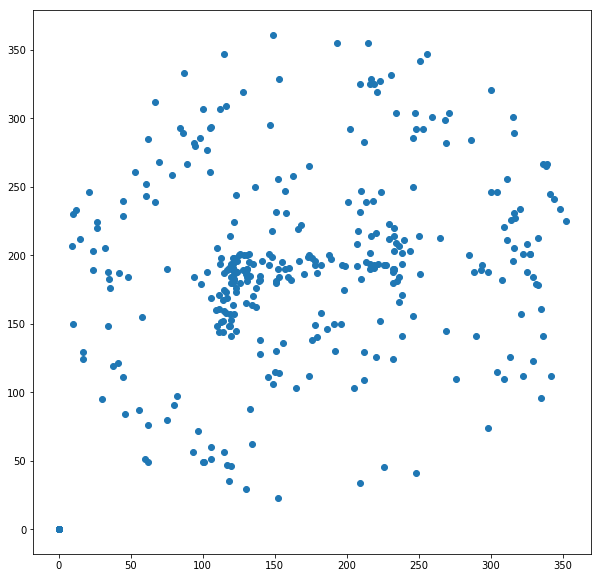

In [6]:
fig = plt.figure(figsize=(10,10))
plt.scatter(x,y)

In [7]:
img = cv2.imread("C:/Users/Abhi/Desktop/Minor/wMBkt.png")
img_o= img
img1 = mp.imread("C:/Users/Abhi/Desktop/Minor/wMBkt.png")

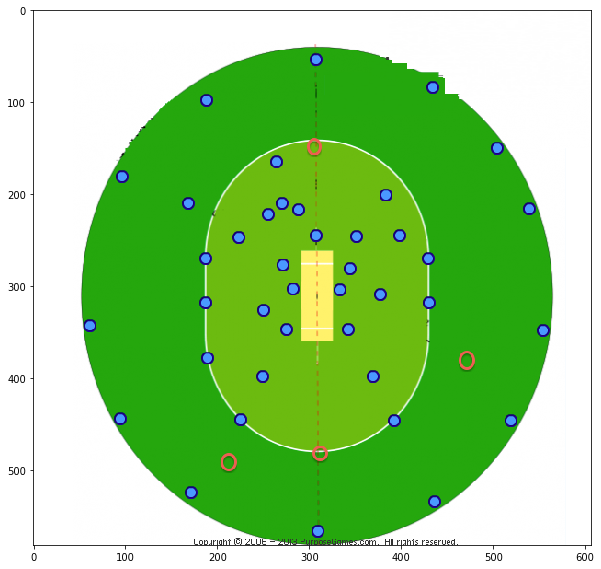

In [8]:
fig = plt.figure(figsize=(10,10))
plt.imshow(img1)

In [9]:
imghsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])
mask_blue = cv2.inRange(imghsv, lower_blue, upper_blue)
_, contours, _ = cv2.findContours(mask_blue, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
im = np.copy(img)
cv2.drawContours(im, contours, -1, (0, 255, 0), 1)
cv2.imwrite("contours_blue.png", im)

True

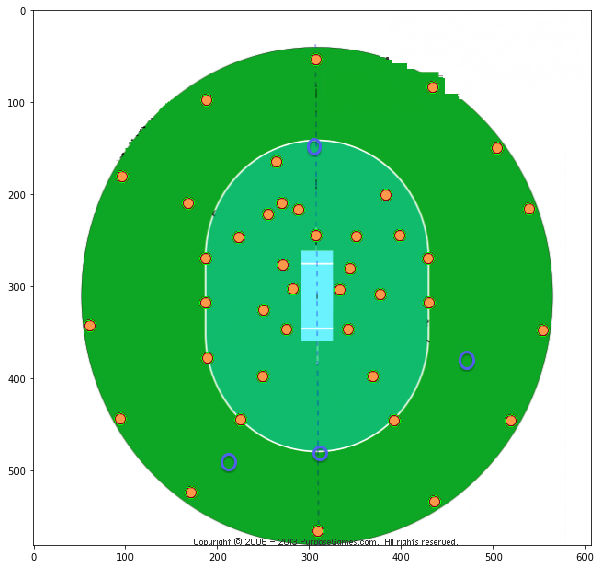

In [10]:
plt.figure(figsize=[10,10])
plt.imshow(im)

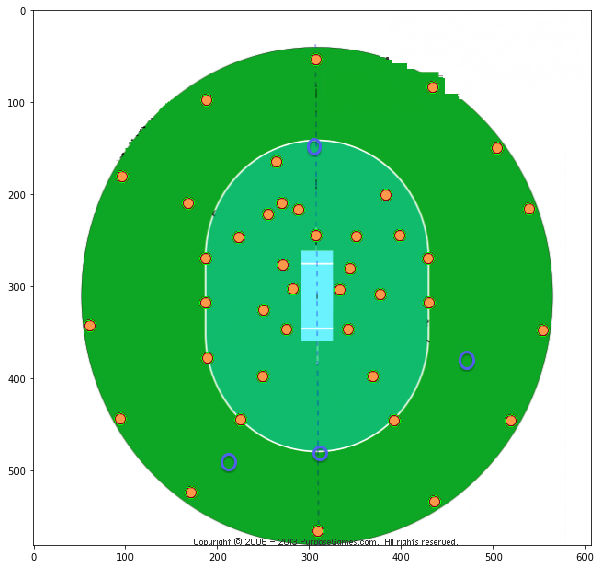

In [11]:
centres = []
plt.figure(figsize=[10,10])
plt.imshow(im)
for c in contours:
    M = cv2.moments(c)
    cx = int(M["m10"] / M["m00"])
    cy = int(M["m01"] / M["m00"])
    centres.append([cx,cy])
    cv2.drawContours(im, [c], -1, (0, 255, 0), 1)
    cv2.circle(im, (cx,cy) , 1, (255, 255, 255), -1)

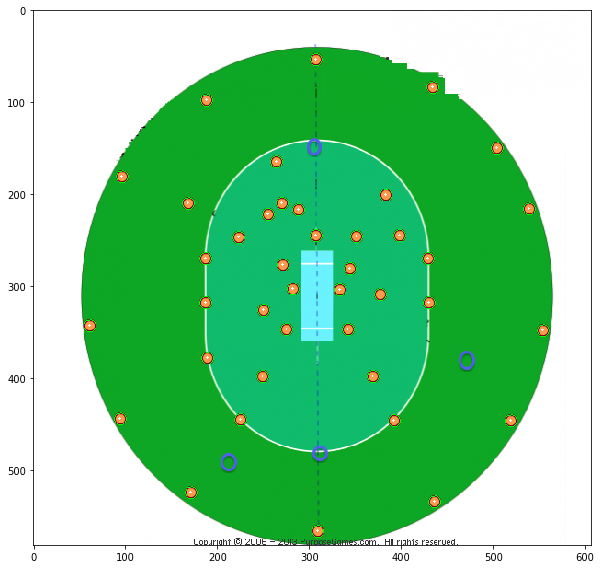

In [12]:
plt.figure(figsize=[10,10])
plt.imshow(im)

In [13]:
cv2.imwrite('processed_image.jpg',im)

True

In [14]:
file = open("probable_positions.csv",'w')
writer = csv.writer(file)
writer.writerow(['x','y'])

5

In [15]:
for c in centres:
    writer.writerow(c)
file.close()
print(centres)

[[309, 566], [436, 534], [171, 524], [519, 446], [392, 446], [225, 445], [94, 444], [369, 398], [249, 398], [189, 378], [554, 348], [342, 347], [275, 347], [61, 343], [250, 326], [430, 318], [187, 318], [377, 309], [333, 304], [282, 303], [344, 281], [271, 277], [429, 270], [187, 270], [223, 247], [351, 246], [398, 245], [307, 245], [255, 222], [288, 217], [539, 216], [270, 210], [168, 210], [383, 201], [96, 181], [264, 165], [504, 150], [188, 98], [434, 84], [307, 54]]


In [16]:
x_sum = 0
y_sum = 0
x_min = y_min = 999999
y_max = x_max = -99999

for i in range(len(x)):
    if x[i]== 0 or y[i]==0:
        continue
    x_sum += x[i]
    y_sum += y[i]
    x_min = min(x[i],x_min)
    x_max = max(x[i],x_max)
    y_min = min(y[i],y_min)
    y_max = max(y[i],y_max)

In [17]:
x_min_points  = x_min
y_min_points  = y_min
x_max_points  = x_max
y_max_points  = y_max 
print(x_min_points,x_max_points)
print(y_min_points,y_max_points)

9 352
23 361


In [18]:
x_min = y_min = 999999
y_max = x_max = -99999

for i in range(len(centres)):
    x_min = min(centres[i][0],x_min)
    x_max = max(centres[i][0],x_max)
    y_min = min(centres[i][1],y_min)
    y_max = max(centres[i][1],y_max)

In [19]:
print(x_min,x_max)
print(y_min,y_max)

61 554
54 566


In [20]:
def convertx(p,c = 22 ,d = 330,a=x_min,b=x_max):
    return c+((p-a)*(d-c))/(b-a)



def converty(q,c = 25,d = 350,a=y_min,b=y_max):
    return c + float(q-a)*float(d-c)/(b-a)  

In [21]:
cx_l = []
cy_l = []
for i in range(len(centres)):
    cx_l.append(convertx(centres[i][0]))
    cy_l.append(converty(centres[i][1]))

In [22]:
file = open("probable_positions.csv",'w')
writer = csv.writer(file)
writer.writerow(['x','y','in_1_out_0'])

16

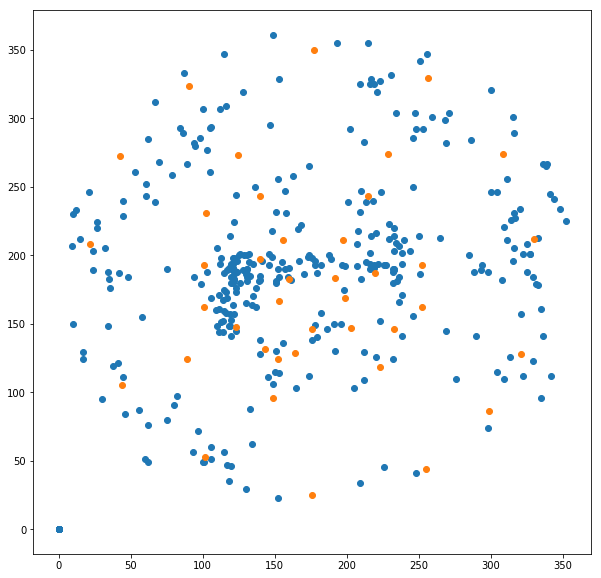

In [23]:
fig = plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.scatter(cx_l,cy_l)

In [24]:
cn_x = 309
cn_y = 311
im_m = cv2.imread("processed_image.jpg")

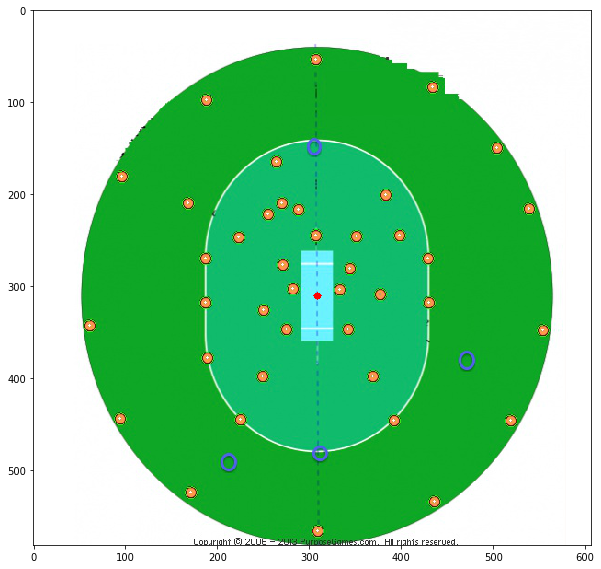

In [25]:
cv2.circle(im_m, (cn_x,cn_y) , 4, (255, 0, 0), -1)
plt.figure(figsize=[10,10])
plt.imshow(im_m)

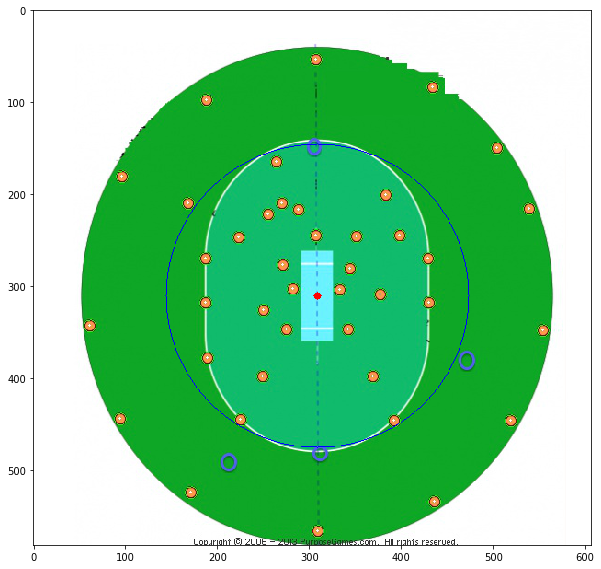

In [26]:
cv2.circle(im_m, (cn_x,cn_y) , 165, (0, 0, 255), 1)
plt.figure(figsize=[10,10])
plt.imshow(im_m)

In [27]:
def dist(x,y):
    global cn_x
    global cn_y
    return math.sqrt((x-cn_x)*(x-cn_x)+(y-cn_y)*(y-cn_y))

26


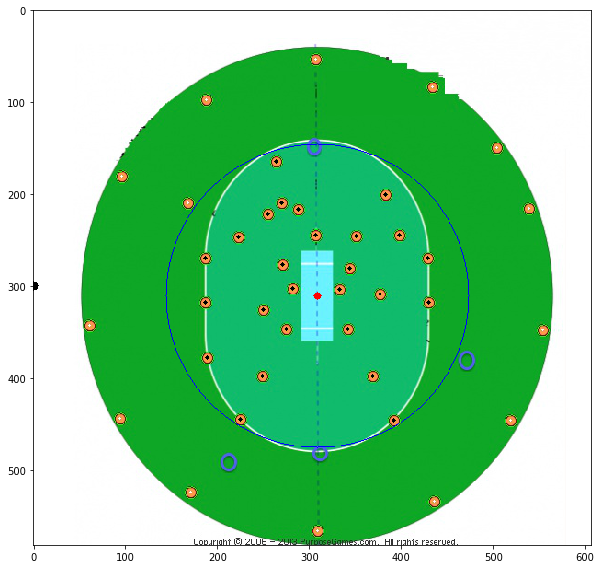

In [28]:
count = 0
p_in1 = []
for i in range(len(centres)):
    
    if dist(int(centres[i][0]),int(centres[i][1]))<165:
        
        count+=1
        
        cv2.circle(im_m, (int(centres[i][0]),int(centres[i][1])) , 2, (0, 0, 0), -1)
        p_in1.append(1)
        #writer.writerow([cx_l[i],cy_l[i],1])
    else:
        p_in1.append(0)
        writer.writerow([cx_l[i],cy_l[i],0])
print(count)        
cv2.circle(im_m, (0,300 ), 5, (0, 0, 0), -1)
plt.figure(figsize=[10,10])
plt.imshow(im_m)
file.close()


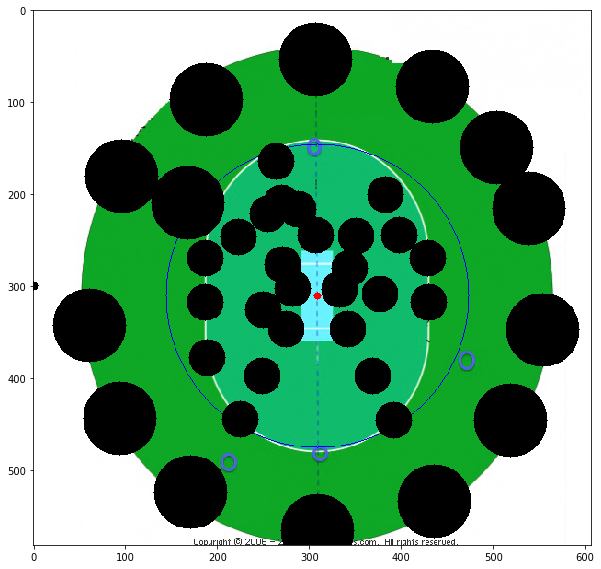

In [29]:
count = 0
for i in range(len(centres)):
    #print(dist(int(cx[i]),int(cy[i])))
    if dist(int(centres[i][0]),int(centres[i][1]))<165:
        
        count+=1
        
        cv2.circle(im_m, (int(centres[i][0]),int(centres[i][1])) , 20, (0, 0, 0), -1)
    else:
        cv2.circle(im_m, (int(centres[i][0]),int(centres[i][1])) , 40, (0, 0, 0), -1)
plt.figure(figsize=[10,10])
plt.imshow(im_m)
file.close()

In [30]:
file = open("C:/Users/Abhi/Desktop/Minor/probable_positions.csv")
data = pd.read_csv(file)
px = data.iloc[:,0].values  
py = data.iloc[:,1].values
pin = p_in1
cn_y -=32

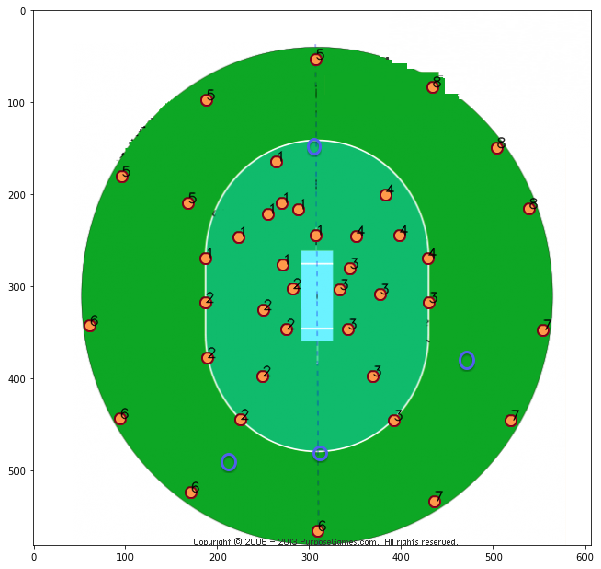

In [31]:
img_t = cv2.imread("C:/Users/Abhi/Desktop/Minor/wMBkt.png")
file = open("probable_positions.csv",'w')
writer = csv.writer(file)
writer.writerow(['x','y','p'])

hit_block = []
for i in range(len(centres)):
    tst_px = centres[i][0]
    tst_pxc = convertx(tst_px)
    tst_py = centres[i][1]
    tst_pyc = converty(tst_py)
    if (tst_px-cn_x) > 0:
        if (tst_py-cn_y) > 0:
            if p_in1[i]==1:
                writer.writerow([tst_pxc,tst_pyc,3])
                cv2.putText(img_t, '3', (tst_px, tst_py), cv2.FONT_HERSHEY_SIMPLEX, .5, (0, 0, 0), lineType=cv2.LINE_AA) 
            else:
                writer.writerow([tst_pxc,tst_pyc,7])
                cv2.putText(img_t, '7', (tst_px, tst_py), cv2.FONT_HERSHEY_SIMPLEX, .5, (0, 0, 0), lineType=cv2.LINE_AA) 
        else:   
            if p_in1[i]==1:
                writer.writerow([tst_pxc,tst_pyc,4])
                cv2.putText(img_t, '4', (tst_px, tst_py), cv2.FONT_HERSHEY_SIMPLEX, .5, (0, 0, 0), lineType=cv2.LINE_AA) 
            else:
                writer.writerow([tst_pxc,tst_pyc,8])
                cv2.putText(img_t, '8', (tst_px, tst_py), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), lineType=cv2.LINE_AA) 
    else:
        if (tst_py-cn_y) > 0:
            if p_in1[i]==1:
                writer.writerow([tst_pxc,tst_pyc,2])
                cv2.putText(img_t, '2', (tst_px, tst_py), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), lineType=cv2.LINE_AA) 
            else:
                writer.writerow([tst_pxc,tst_pyc,6])
                cv2.putText(img_t, '6', (tst_px, tst_py), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), lineType=cv2.LINE_AA) 
        else:
            if p_in1[i]==1:
                writer.writerow([tst_pxc,tst_pyc,1])
                cv2.putText(img_t, '1', (tst_px, tst_py), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), lineType=cv2.LINE_AA) 
            else:
                writer.writerow([tst_pxc,tst_pyc,5])
                cv2.putText(img_t, '5', (tst_px, tst_py), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), lineType=cv2.LINE_AA) 

plt.figure(figsize =[10,10])
plt.imshow(img_t)
file.close()

In [32]:
x_l = [] 
y_l = []
for i in range(len(x)):
    if  x[i]==0 or y[i]==0:
        continue
    x_l.append(x[i])
    y_l.append(y[i])

In [33]:
points = pd.DataFrame({'x': x_l,'y': y_l})
kmeans = KMeans(n_clusters=9)
kmeans.fit(points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
labels = kmeans.predict(points)
centroids = kmeans.cluster_centers_
print(labels)
print(centroids)

[2 2 2 2 2 0 7 1 2 2 2 5 8 5 7 1 2 2 2 5 1 2 7 4 0 1 2 2 2 2 8 8 0 2 1 2 2
 2 2 2 4 3 3 7 2 2 3 1 8 0 3 6 1 8 2 1 2 7 6 5 1 2 2 2 2 2 8 1 6 2 3 8 7 0
 2 2 7 3 0 7 2 2 0 8 3 2 0 3 0 2 2 7 4 8 5 7 2 5 7 1 2 2 6 5 2 1 5 7 0 2 5
 5 3 4 6 1 4 4 1 1 2 4 4 6 2 6 1 4 1 2 1 1 3 2 1 8 1 0 2 2 2 2 1 1 2 6 4 2
 1 2 2 1 0 8 2 3 0 4 1 1 5 4 2 1 5 0 1 2 2 1 1 0 8 6 4 5 7 1 8 4 4 3 1 2 4
 2 1 2 3 1 2 1 8 4 2 1 1 2 2 5 2 1 1 7 4 0 4 1 5 3 3 8 2 3 1 5 8 1 1 5 0 1
 2 0 2 2 0 1 2 1 2 3 1 2 4 2 3 1 2 4 1 4 4 1 7 6 5 1 6 2 8 4 6 3 7 5 0 0 2
 2 8 2 0 0 5 8 2 0 1 2 5 8 5 2 7 5 8 1 0 3 7 2 2 4 7 7 8 2 2 7 3 4 3 1 4 8
 1 1 7 2 4 7 3 5 1 5 4 6 7 2 4 5 2 8 8 7 2 7 6 2 2 7 2 1 2 7 4 3 7 4 7 3 2
 7 4 0 4 5]
[[ 88.42307692  68.61538462]
 [217.77966102 202.03389831]
 [128.27835052 182.13402062]
 [242.44       313.04      ]
 [319.55882353 218.38235294]
 [188.44444444 119.25925926]
 [312.78571429 123.07142857]
 [108.67741935 286.64516129]
 [ 33.         197.36      ]]


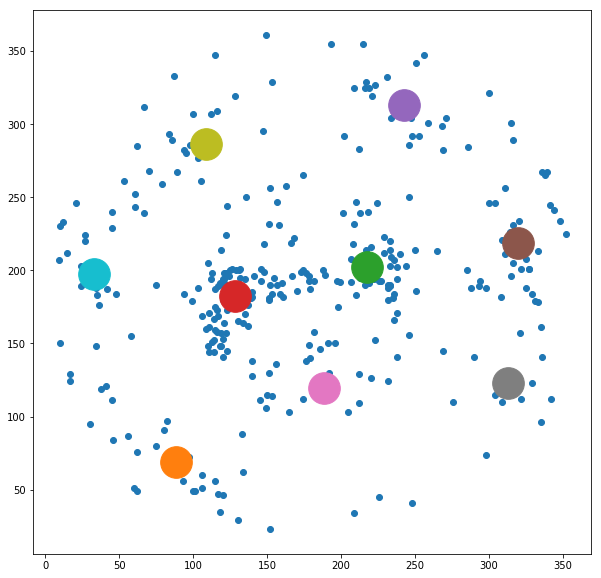

In [35]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(x_l,y_l)
for i in range(0,len(centroids)):
    plt.scatter(centroids[i][0],centroids[i][1],s=1000)

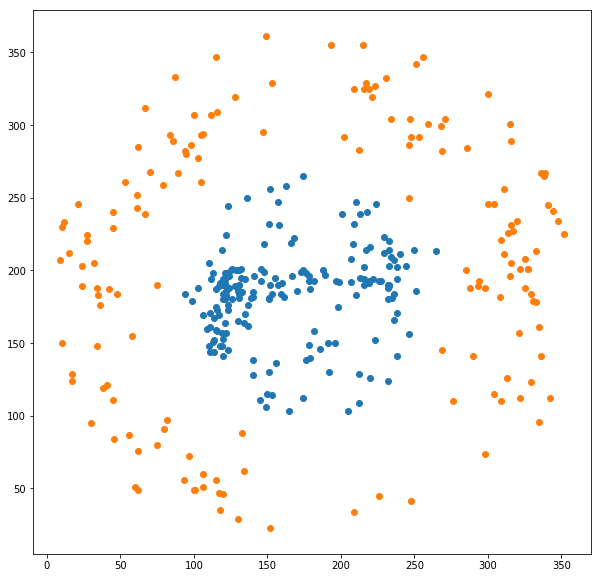

In [36]:
mid_x = 176.0 
mid_y = 180.5
def dist(a,b,c,d):
    x = (a-c)
    y = (b-d)
    return math.sqrt(x*x+y*y)*0.41

in_x = []
in_y = []
out_x = []
out_y = []
for i in range(len(x_l)):
    p = dist(x_l[i],y_l[i],mid_x,mid_y)
    if(p >= 40) :
        out_x.append(x_l[i])
        out_y.append(y_l[i])
    else:
        in_x.append(x_l[i])
        in_y.append(y_l[i])
plt.figure(figsize = [10,10])
plt.scatter(in_x,in_y)
plt.scatter(out_x,out_y)

In [37]:
points_in = pd.DataFrame({'x': in_x,'y': in_y})
kmeans = KMeans(n_clusters=5)
kmeans.fit(points_in)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [38]:
labels = kmeans.predict(points_in)
centroids = kmeans.cluster_centers_

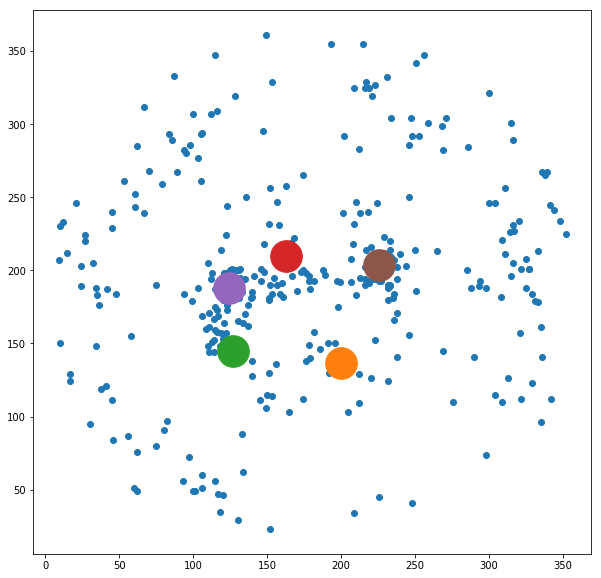

In [39]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(x_l,y_l)
for i in range(0,len(centroids)):
    plt.scatter(centroids[i][0],centroids[i][1],s=1000)

In [40]:
points_out = pd.DataFrame({'x': out_x,'y': out_y})
kmeans_out = KMeans(n_clusters=4)
kmeans_out.fit(points_out)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [41]:
labels_out = kmeans_out.predict(points_out)
centroids_out = kmeans_out.cluster_centers_

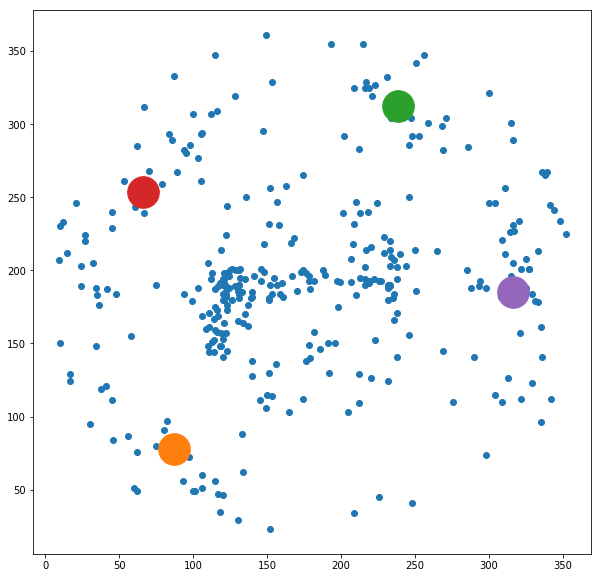

In [42]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(x_l,y_l)
for i in range(0,len(centroids_out)):
    plt.scatter(centroids_out[i][0],centroids_out[i][1],s=1000)

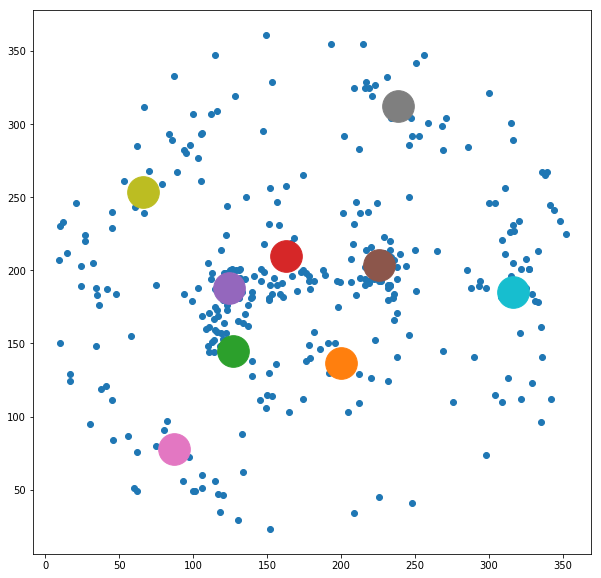

In [43]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(x_l,y_l)
for i in range(0,len(centroids)):
    plt.scatter(centroids[i][0],centroids[i][1],s=1000)
for i in range(0,len(centroids_out)):
    plt.scatter(centroids_out[i][0],centroids_out[i][1],s=1000)

In [44]:
file = open('virat.csv','w')
writer = csv.writer(file)
writer.writerow(['x','y'])

5

In [45]:
for i in range(len(centroids_out)):
    writer.writerow(centroids_out[i])
for i in range(len(centroids)):
    writer.writerow(centroids[i])
file.close()